In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat
    
def standRegres(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    xTx =xMat.T * xMat
    if np.linalg.det(xTx) == 0.0:
        print "this matrix is singular, cannot do inverse"
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws

array([[ 1.        ,  0.98647356],
       [ 0.98647356,  1.        ]])

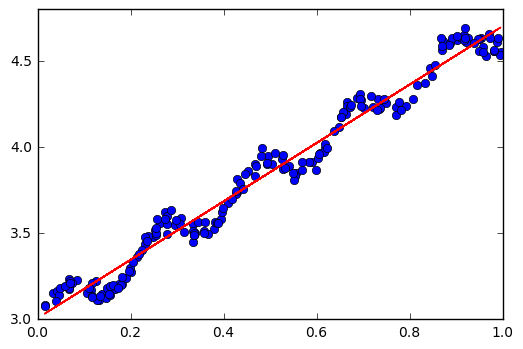

In [3]:
dataMat, labelMat = loadDataSet('ex0.txt')
plt.figure()
dataMat = np.array(dataMat)
labelMat = np.array(labelMat)
x = dataMat[:,1]
y = labelMat
plt.plot(x,y,'bo')
ws = standRegres(dataMat, labelMat)
xMat = np.mat(dataMat)
y_predict = xMat  * ws
x1 = dataMat[:,1]
plt.plot(x1, y_predict,'r')
np.corrcoef(y_predict.T, labelMat) # 相关系数

In [4]:
def lwlr(testPoint, xArr, yArr, k = 1.0):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    #print yMat.shape
    m,n = xMat.shape
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diffMat = testPoint - xMat[j,:]
        weights[j,j] = np.exp(diffMat * diffMat.T / (-2.0 * k**2))
    xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        print "this matrix is singular, cannot do inverse"
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

def lwlrTest(testArr, xArr, yArr, k = 1.0):
    m, n = testArr.shape
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    #print yHat
    return yHat

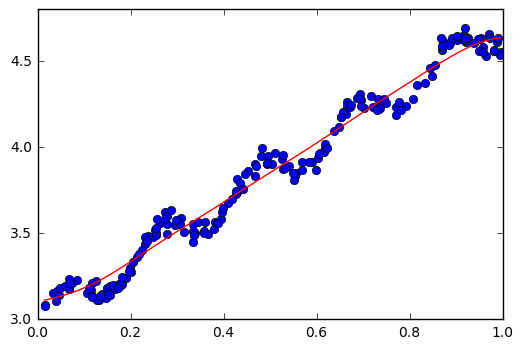

In [6]:
xArr, yArr = loadDataSet('ex0.txt')
dataMat = np.array(xArr)
labelMat = np.array(yArr)
plt.figure()
x = dataMat[:,1]
y = labelMat
plt.plot(x,y,'bo')

xArr, yArr = loadDataSet('ex0.txt')
dataMat = np.array(xArr)
labelMat = np.array(yArr)
yHat = lwlrTest(dataMat, dataMat, yArr, 0.1)
#print yHat

dataMat = np.mat(dataMat)
strInd = dataMat[:,1].argsort(0) # dataMat[strInd]是一个三维数组
x1 = dataMat[strInd][:,0,:][:, 1]
y1 = yHat[strInd]
plt.plot(x1, y1,'r')